# For the given dataset 'Iris',create decision tree classifier and visualize it graphically

# Importing Libraries

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.model_selection as model_selection
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

In [4]:
# Setting the working directory
os.chdir("C:\\Users\\RetailAdmin\\Downloads\\Documents\\New folder")
data_dir=os.getcwd()
data_dir

'C:\\Users\\RetailAdmin\\Downloads\\Documents\\New folder'

# Loading Dataset

In [5]:
data=pd.read_csv("iris.csv")

# Exploratory Data Analysis

In [6]:
#cheking null values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Dataset has no null values

In [50]:
#Dimention of dataset
data.shape

(150, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
#checking 1st five rows
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
#Irrelevant column is droped
data.drop(['Id'],axis=1,inplace=True) 

In [12]:
data.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [13]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Visualizing the dataset

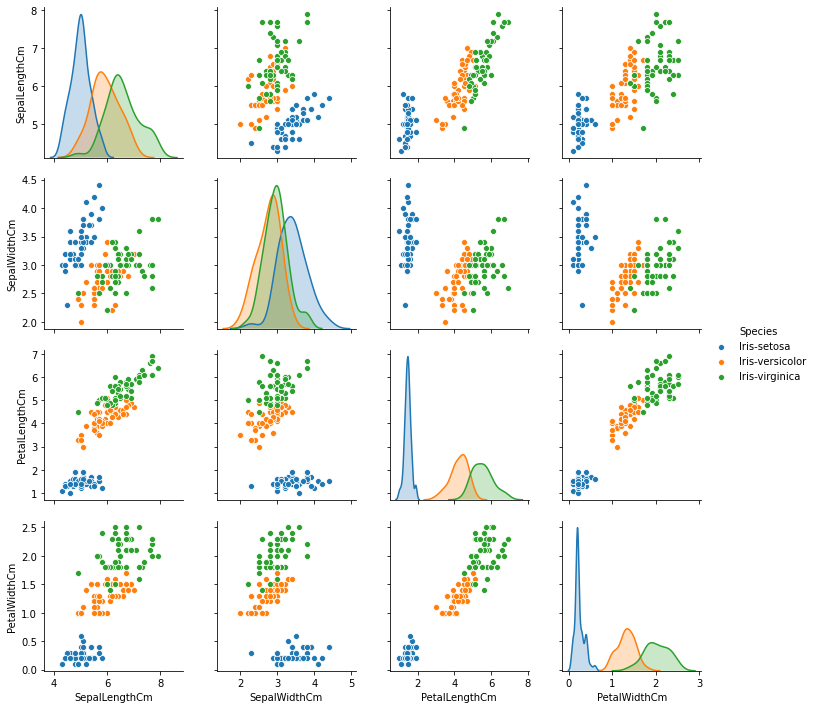

In [14]:
sns.pairplot(data,hue='Species')
plt.show()

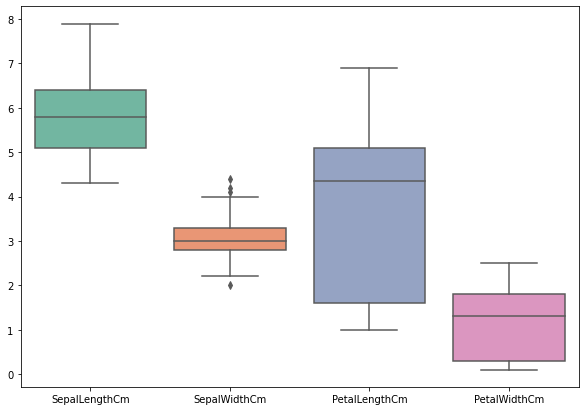

In [21]:
plt.figure(figsize=(10,7))
sns.boxplot(data=data,orient="v",palette='Set2')

{'whiskers': [<matplotlib.lines.Line2D at 0x1cf99b544a8>,
 'caps': [<matplotlib.lines.Line2D at 0x1cf99b54ba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cf99b54358>],
 'medians': [<matplotlib.lines.Line2D at 0x1cf999502e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cf99950668>],
 'means': []}

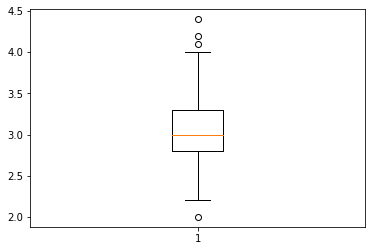

In [22]:
#to see the extremes
bp=plt.boxplot(data['SepalWidthCm'])
bp

In [23]:
a=bp['fliers'][0]

In [24]:
a.get_data()[1]

array([2. , 4.4, 4.1, 4.2])

# Feature Selection

In [25]:
X=pd.DataFrame(data.drop("Species",axis=1))

In [26]:
y=pd.DataFrame(data["Species"])

In [27]:
# Create a label encoder object
le = LabelEncoder()
y['Species']=le.fit_transform(y['Species'])

In [28]:
y['Species'].unique()

array([0, 1, 2])

In [29]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [31]:
# Defining the decision tree algorithm

dtree=DecisionTreeClassifier()
dtree.fit(X,y)
print('Decision Tree Classifer Created')

Decision Tree Classifer Created


# Visualizing Desicion tree

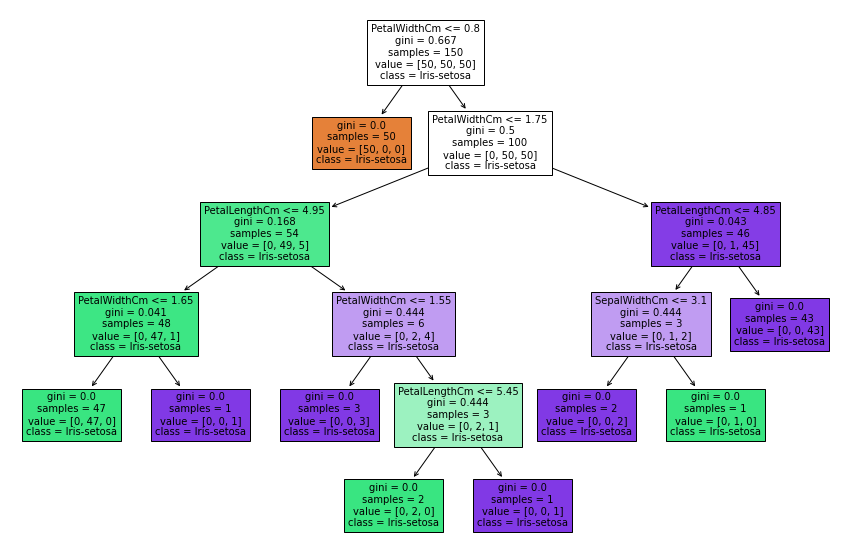

In [32]:
fig=plt.figure(figsize=(15,10))
plot_tree=tree.plot_tree(dtree,feature_names=X.columns,
                        class_names=data['Species'],
                        filled=True)

# Spliting data into Train and Test set

In [41]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=24)

In [42]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
78,6.0,2.9,4.5,1.5
17,5.1,3.5,1.4,0.3
77,6.7,3.0,5.0,1.7
92,5.8,2.6,4.0,1.2
133,6.3,2.8,5.1,1.5


In [43]:
y_train.head()

,Species
78,1
17,0
77,1
92,1
133,2


In [44]:
print(X_train.shape,X_test.shape)

(120, 4) (30, 4)


# Model building

In [45]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# Evaluation

In [46]:
#Average number of correct predictions
dtree.score(X_test,y_test)

1.0

In [47]:
y_pred=dtree.predict(X_test)
y_pred

array([2, 2, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 1, 2, 0, 2, 2, 0, 2])

In [48]:
#Confusion matrix

cm=confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  4,  0],
       [ 0,  0, 16]], dtype=int64)

In [49]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 1.0
